# Ví dụ 1: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read csv data file, change to your location
df = pd.read_csv("Iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


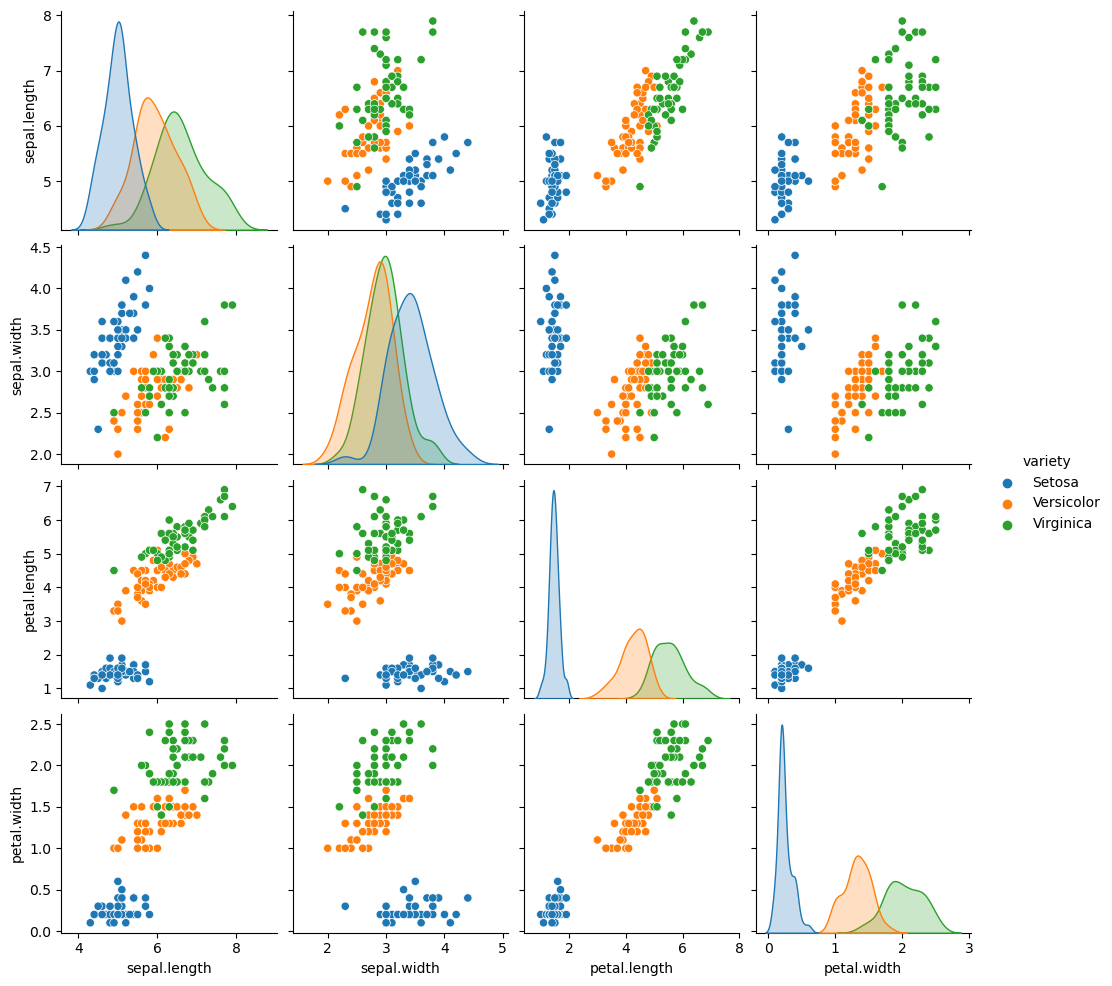

In [3]:
# show data information
df
df.describe()
sns.pairplot(df, hue='variety')
plt.show()

In [4]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop("variety", 1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4680\915578482.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


Text(0.5, 1.0, 'Correlation matrix')

In [5]:
# method1 
u,s,v = np.linalg.svd(X_corr) 
eig_values, eig_vectors = s, u 
eig_values, eig_vectors 
 
# method2 
np.linalg.eig(X_corr) 

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [6]:
# plotting the variance explained by each PC  
explained_variance=(eig_values / np.sum(eig_values))*100 
plt.figure(figsize=(8,4)) 
plt.bar(range(4), explained_variance, alpha=0.6) 
plt.ylabel('Percentage of explained variance') 
plt.xlabel('Dimensions') 

Text(0.5, 0, 'Dimensions')

In [7]:
pc1 = X.dot(eig_vectors[:,0]) 
pc2 = X.dot(eig_vectors[:,1])

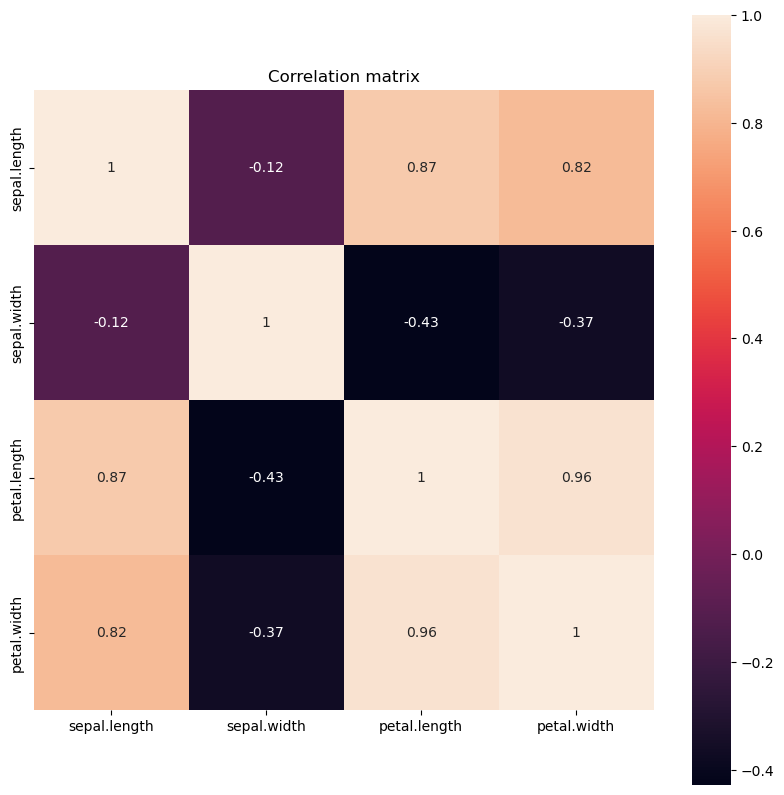

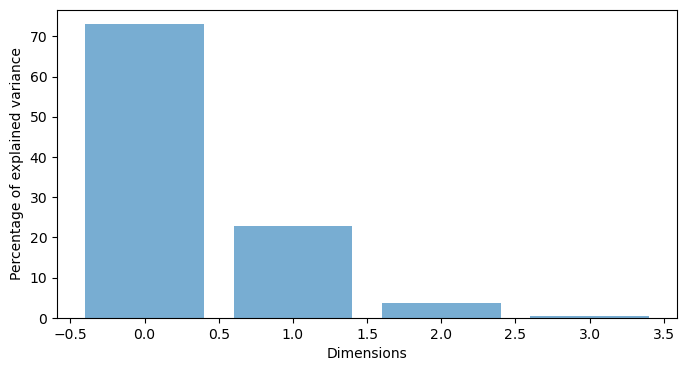

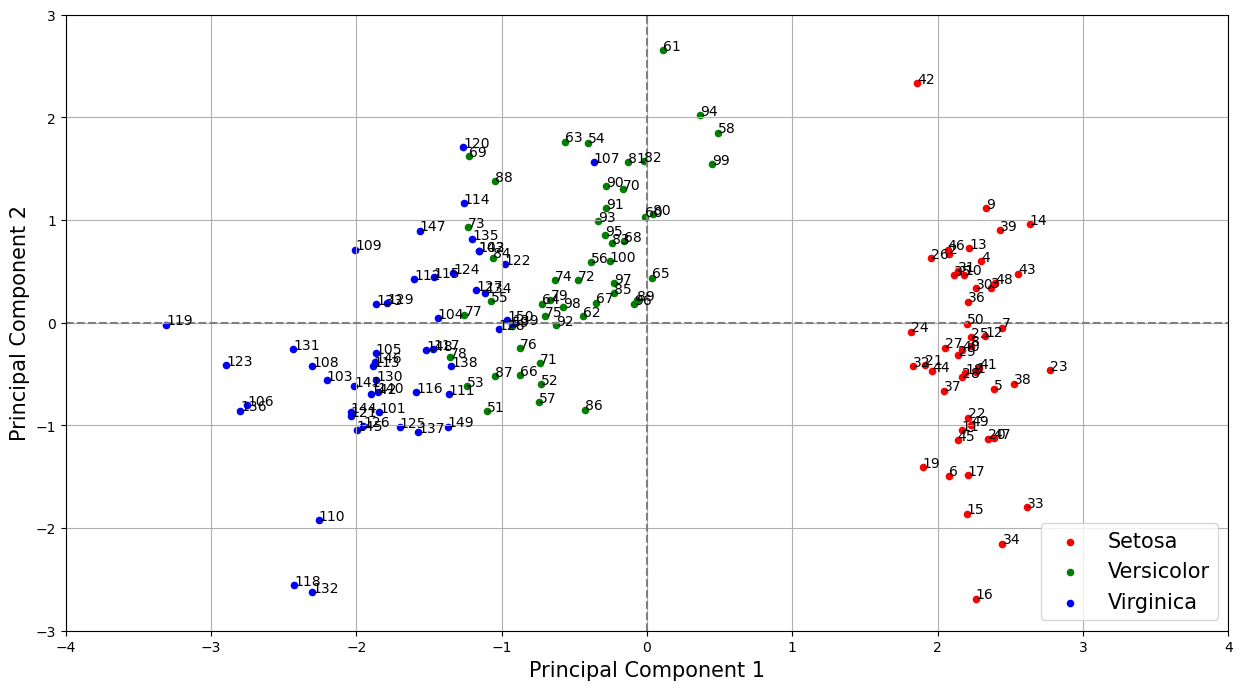

In [8]:
def plot_scatter(pc1, pc2): 
    fig, ax = plt.subplots(figsize=(15, 8)) 
     
    species_unique = list(set(species)) 
    species_colors = ["r","b","g"] 
     
    for i, spec in enumerate(species): 
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, 
c=species_colors[species_unique.index(spec)]) 
        ax.annotate(str(i+1), (pc1[i],pc2[i])) 
     
    from collections import OrderedDict 
    handles, labels = plt.gca().get_legend_handles_labels() 
    by_label = OrderedDict(zip(labels, handles)) 
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4) 
     
    ax.set_xlabel('Principal Component 1', fontsize = 15) 
    ax.set_ylabel('Principal Component 2', fontsize = 15) 
    ax.axhline(y=0, color="grey", linestyle="--") 
    ax.axvline(x=0, color="grey", linestyle="--") 
     
    plt.grid() 
    plt.axis([-4, 4, -3, 3]) 
    plt.show() 
     
plot_scatter(pc1, pc2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4680\1404442123.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("variety", 1)


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

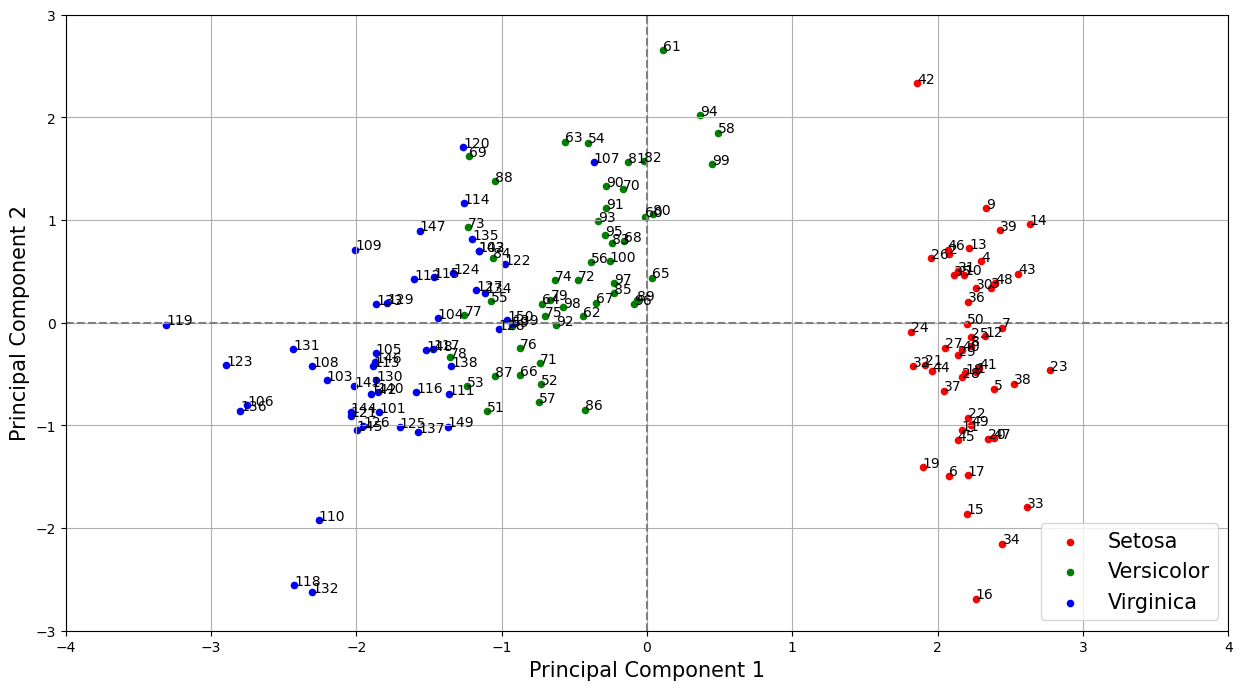

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
#Read csv data file, change to your location 
df = pd.read_csv("iris.csv") 
 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
 
X = df.drop("variety", 1) 
X = StandardScaler().fit_transform(X) 
print(X)
pca = PCA(n_components=2) 
result = pca.fit_transform(X) 
# Remember what we said about the sign of eigen vectors that might change ? 
pc1 = - result[:,0] 
pc2 = - result[:,1] 
plot_scatter(pc1, pc2)

 # Ví dụ 2: 

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [13]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [14]:
X = df.drop('id', 1)
X = df.drop('class', 1)
y = df['class']
y = np.asarray(y)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=200)
results = pca.fit_transform(X)
print(results)

[[-10.047372     1.47107589  -6.84640349 ...  -0.08317402   0.04269679
    0.60922915]
 [-10.63772503   1.58374871  -6.83097697 ...   0.86028389   0.44796065
    0.13380987]
 [-13.51618517  -1.25354256  -6.81869746 ...  -0.2658027   -0.5012822
    0.94902461]
 ...
 [  8.2702643    2.39128504  -0.90867045 ...   0.22858331   0.35385843
    0.07586896]
 [  4.01176047   5.4122567   -0.84713174 ...  -0.23569287  -0.22548173
    0.02142151]
 [  3.99311386   6.07241722  -2.02072293 ...  -0.7566692    0.12162222
    0.08864516]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 500)

In [16]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)
logisPred = logisticModel.predict(X_test)
print(logisPred)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [17]:
ac = accuracy_score(y_test, logisPred)
print(ac)

0.828125


# Ví dụ 3:

In [18]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt

In [23]:
# set names to the paths because they're too long
data_path = 'C:/Users/Admin/Dev1ce/Desktop/ds/Machine Learning/Tuần 4' 
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

In [24]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test) 
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

In [25]:
images, labels = get_mnist_data(train_images_path, train_labels_path, 5000) 

print(labels)
print(images.shape, labels.shape) 

[5 0 4 ... 2 1 2]
(5000, 784) (5000,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.7)

start = time.time()
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train, y_train)
predLog = modelLogistic.predict(X_test)
end = time.time()
print(accuracy_score(y_test, predLog))
print(end -start)


0.884
1.3901917934417725


In [27]:
pca = PCA(n_components=100)
images1 = pca.fit_transform(images)
X1_train, X1_test, y1_train, y1_test = train_test_split(images1, labels, train_size=0.7)
print(X1_train.shape)
start1 = time.time()
modelLogistic1 = LogisticRegression()
modelLogistic1.fit(X1_train, y1_train)
pred1 = modelLogistic1.predict(X1_test)
end1 = time.time()

print(accuracy_score(y_test, pred1))
print(end1 -start1)

(3500, 100)
0.09933333333333333
0.28529953956604004
